# Customer churn prediction: Telecom Churn Dataset

## Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

Data Description
7043 observations with 33 variables

**CustomerID**: A unique ID that identifies each customer.

**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [1]:
import pandas as pd 
import numpy as np
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

In [2]:
df = pd.read_excel('Telco_customer_churn_dataset.xlsx')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.shape

(7043, 33)

In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
col = []
d_type = []
uniques = []
n_uniques = []
for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:5])
    n_uniques.append(df[i].nunique())

report=pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_values': uniques, 'n_uniques': n_uniques})

In [9]:
report

,Column,d_type,unique_values,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


**According to first output, we do not need to following features:**
   * CustomerID
   * Count
   * Country
   * State
   * LatLong
   * Latitude
   * Longitude
   
   
**Also, we have to turn 'Total Charge' into numerical format.**

In [10]:
df['Total Charges']=pd.to_numeric(df['Total Charges'], errors='coerce')

In [11]:
# Modify cols name
new_col = df.columns.str.replace(' ', '_')
df.columns = new_col
df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


---

# EDA

In [12]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [13]:
df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [14]:
# Missing Values
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges          11
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [15]:
df['Total_Charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Total_Charges, dtype: float64

In [16]:
# Fill missing values with median.
df['Total_Charges'].fillna(df['Total_Charges'].median(),inplace=True)

In [17]:
# Check for imbalance class distribution.
df.Churn_Label.value_counts()

No     5174
Yes    1869
Name: Churn_Label, dtype: int64

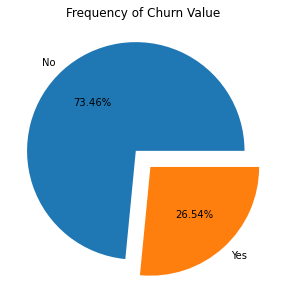

In [18]:
plt.figure(figsize=(10,5))
plt.pie(df['Churn_Label'].value_counts(), labels=df['Churn_Label'].value_counts().keys().to_list(), autopct='%.2f%%',explode=[0.1,0.1])
plt.title('Frequency of Churn Value')
plt.show()

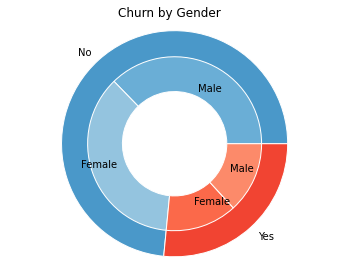

In [19]:

gender = df.groupby('Churn_Label')['Gender'].value_counts().to_frame().rename(columns={'Gender': 'Freq'}).reset_index().sort_values('Churn_Label')

g_names=df['Churn_Label'].value_counts().index
g_size=df['Churn_Label'].value_counts()
subg_names=gender['Gender']
subg_size=gender['Freq']
 
a, b =[plt.cm.Blues, plt.cm.Reds]
 
fig, ax = plt.subplots()
fig.suptitle('Churn by Gender')
ax.axis('equal')
mypie, _ = ax.pie(g_size, radius=1.3, labels=g_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.5, edgecolor='white')
 
mypie2, _ = ax.pie(subg_size, radius=1, labels=subg_names, labeldistance=0.7 ,colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

In [20]:
df['Senior_Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior_Citizen, dtype: int64

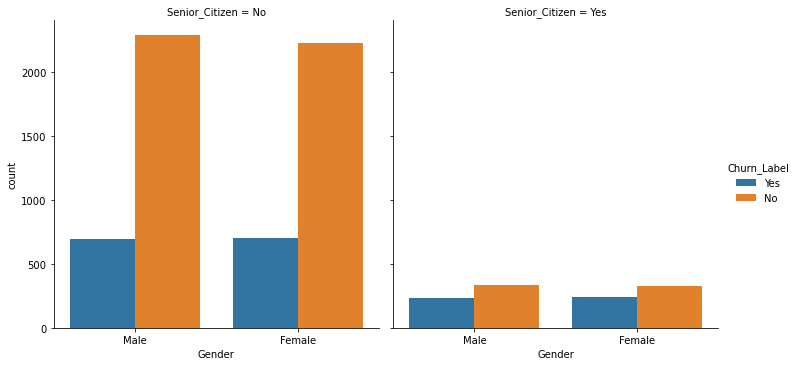

In [21]:
sns.catplot(x='Gender', hue='Churn_Label', col='Senior_Citizen', kind='count', data=df)

**As we can see above bar graphics, If the customers belongs the senior citizen group then churn rate higher.**

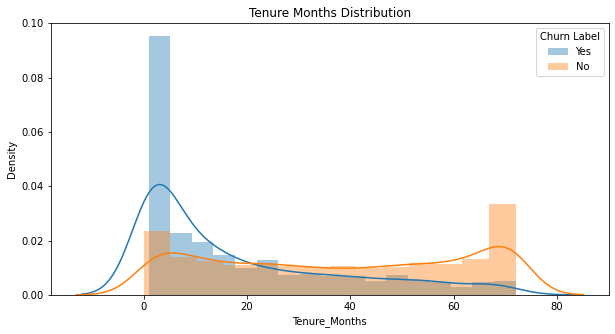

In [22]:
plt.figure(figsize=(10,5))
plt.title('Tenure Months Distribution')
sns.distplot(df[df['Churn_Label'] == 'Yes']['Tenure_Months'], label='Yes')
sns.distplot(df[df['Churn_Label'] == 'No']['Tenure_Months'], label='No')
plt.legend(title='Churn Label',loc= 'upper right')
plt.show()

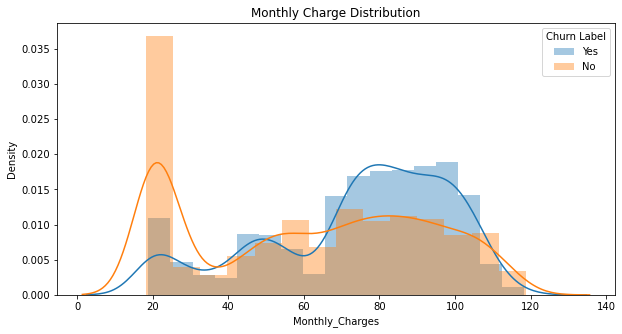

In [23]:
plt.figure(figsize=(10,5))
plt.title('Monthly Charge Distribution')
sns.distplot(df[df['Churn_Label'] == 'Yes']['Monthly_Charges'], label='Yes')
sns.distplot(df[df['Churn_Label'] == 'No']['Monthly_Charges'], label='No')
plt.legend(title='Churn Label',loc= 'upper right')
plt.show()

* **The shorter a customer uses the telco, the probability of churn increase.From here, actions can be taken for telco.** 
* **As we can see from `Monthly Charge Distiribution`,the churn rate of customers with monthly average transactions higher than $70 is increasing.**

In [24]:
df_categorical = df.select_dtypes(include=['object'])
df_numeric =df.select_dtypes(include=['number'])

In [25]:
df_categorical.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Lat_Long', 'Gender',
       'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Churn_Label', 'Churn_Reason'],
      dtype='object')

In [26]:
listofCat = [ 'Phone_Service','Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method']
len(listofCat)

12

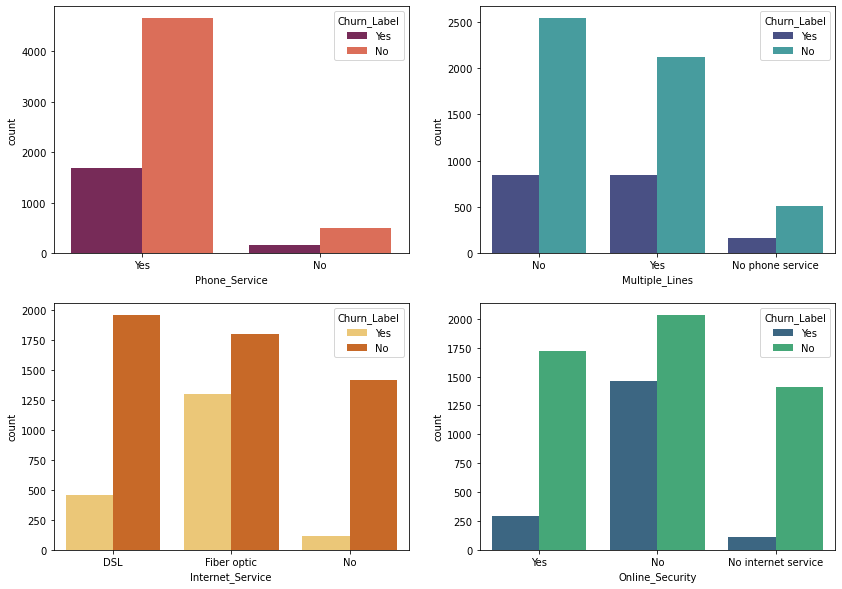

In [27]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('Phone_Service',hue='Churn_Label',data=df,palette='rocket',ax=ax[0,0])
sns.countplot('Multiple_Lines',hue='Churn_Label',data=df,palette='mako',ax=ax[0,1])
sns.countplot('Internet_Service',hue='Churn_Label',data=df,palette='YlOrBr',ax=ax[1,0])
sns.countplot('Online_Security',hue='Churn_Label',data=df,palette='viridis',ax=ax[1,1])

plt.show()

* **Customers with fibre optic Internet Service are more likely to churn from company than people with DSL**
* **Looks like customers having multiple lines are not very satisfied with the service.**
* **Customers that having online security service are more retainable.** 

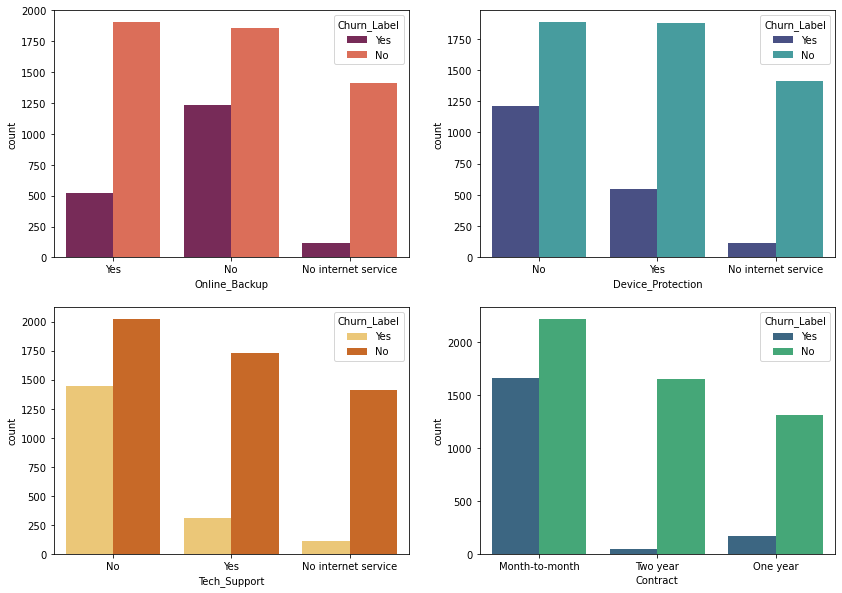

In [28]:

fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('Online_Backup',hue='Churn_Label',data=df,palette='rocket',ax=ax[0,0])
sns.countplot('Device_Protection',hue='Churn_Label',data=df,palette='mako',ax=ax[0,1])
sns.countplot('Tech_Support',hue='Churn_Label',data=df,palette='YlOrBr',ax=ax[1,0])
sns.countplot('Contract',hue='Churn_Label',data=df,palette='viridis',ax=ax[1,1])
plt.show()

* **As we can see from the above tables, customers that having any services are more retainable from the others.**
* **Making a contract with the customer decrease the customer churn rate.**

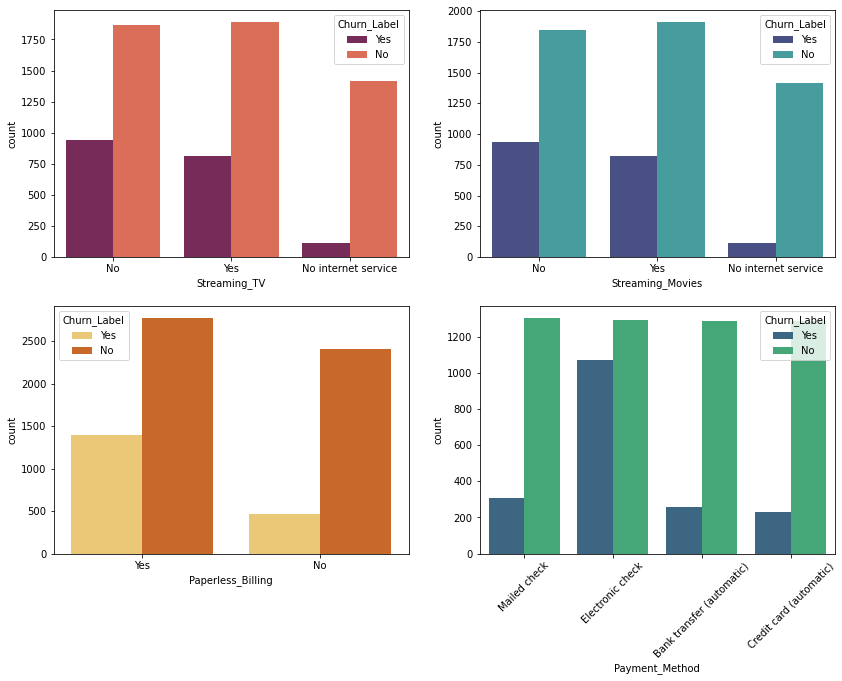

In [29]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('Streaming_TV',hue='Churn_Label',data=df,palette='rocket',ax=ax[0,0])
sns.countplot('Streaming_Movies',hue='Churn_Label',data=df,palette='mako',ax=ax[0,1])
sns.countplot('Paperless_Billing',hue='Churn_Label',data=df,palette='YlOrBr',ax=ax[1,0])
sns.countplot('Payment_Method',hue='Churn_Label',data=df,palette='viridis',ax=ax[1,1])
plt.xticks(rotation=45)
plt.show()

* **We see that the TV and movie churn ratios are almost same to each other.**
* **Customers who choose electronic check as a payment method are closer to churn from telco.**
* **Also we can see from the `Paperless Billing` plot, Customers who choose the paperless billing are more move out from company.** 


In [30]:
df['Zip_Code'].min(),df['Zip_Code'].max()

(90001, 96161)

In [31]:
df[df['Churn_Label'] == 'Yes']['Zip_Code'].value_counts()

90020    5
95367    4
95567    4
96150    4
92397    4
        ..
95468    1
95466    1
91367    1
92505    1
95666    1
Name: Zip_Code, Length: 1190, dtype: int64

In [32]:
df[df['Churn_Label'] == 'Yes']['Zip_Code'].describe()

count     1869.000000
mean     93532.352595
std       1858.939970
min      90001.000000
25%      92105.000000
50%      93554.000000
75%      95358.000000
max      96161.000000
Name: Zip_Code, dtype: float64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


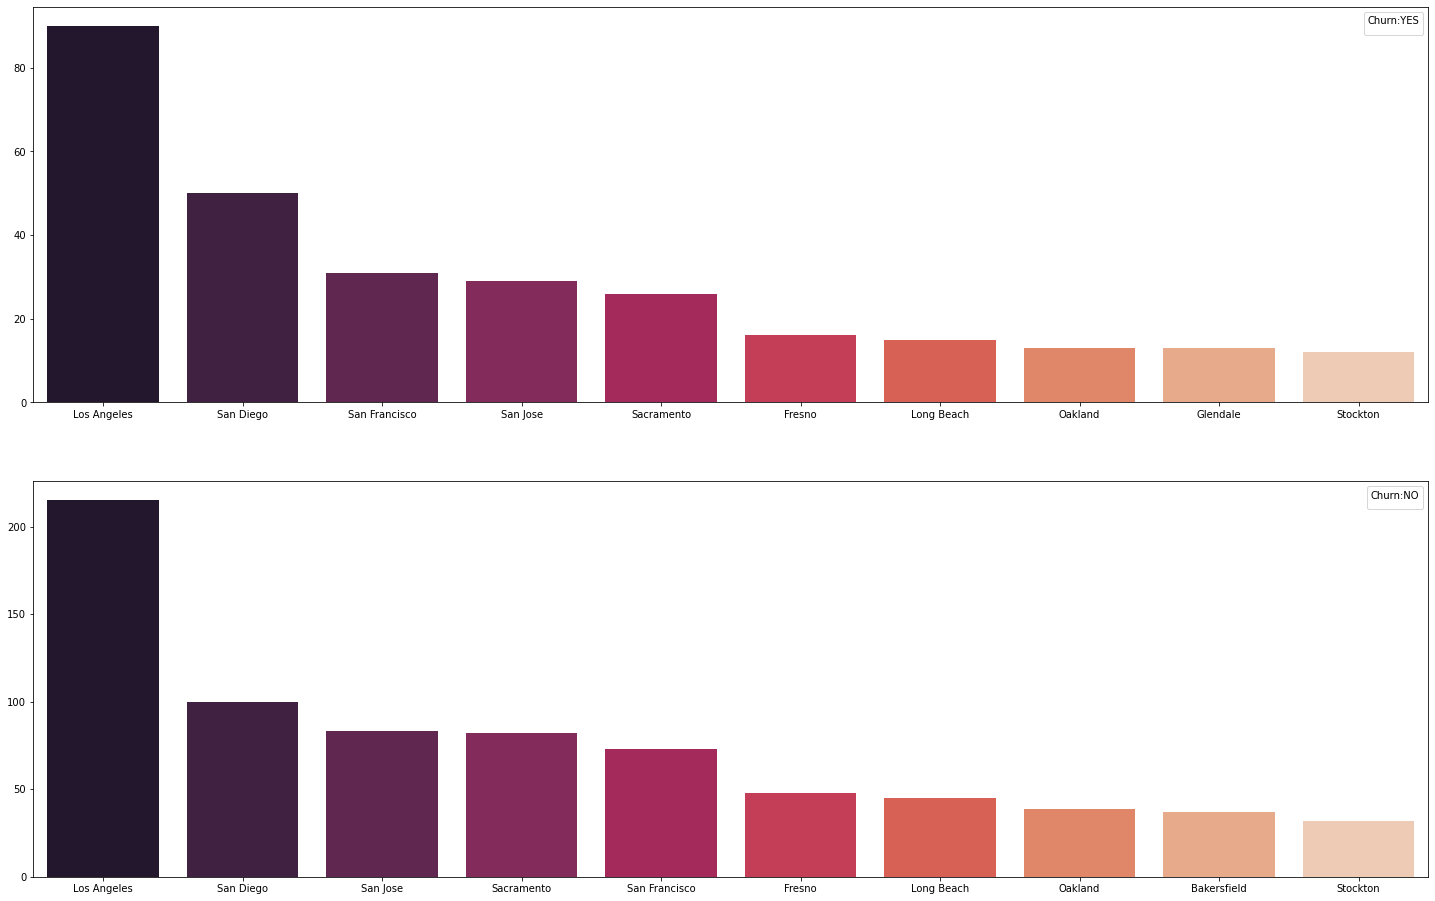

In [33]:
data=df[df['Churn_Label'] == 'Yes']['City'].value_counts().nlargest(10)
data1=df[df['Churn_Label'] == 'No']['City'].value_counts().nlargest(10)
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(25,16))
sns.barplot(data.index,data.values,palette='rocket',ax=ax[0])
sns.barplot(data1.index,data1.values,palette='rocket',ax=ax[1])
ax[0].legend(title='Churn:YES',loc='upper right') 
ax[1].legend(title='Churn:NO',loc='upper right')
plt.show()

**In the table above, we can see the 10 cities with the highest churn rates.**



According to these table, Los angeles is the most important city for telco companies. Also, we know Los Angeles's population is higher than the other citys.

In [34]:
df['Churn_Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [35]:
df['Churn_Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Long distance charges                         44
Limited range of services                     44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn_Reason, 

**According to churn reasons, the competitive telco componies are quite effective at the churn rate.**


<AxesSubplot:title={'center':'Retainable rate of cities according to Monthly Charges'}>

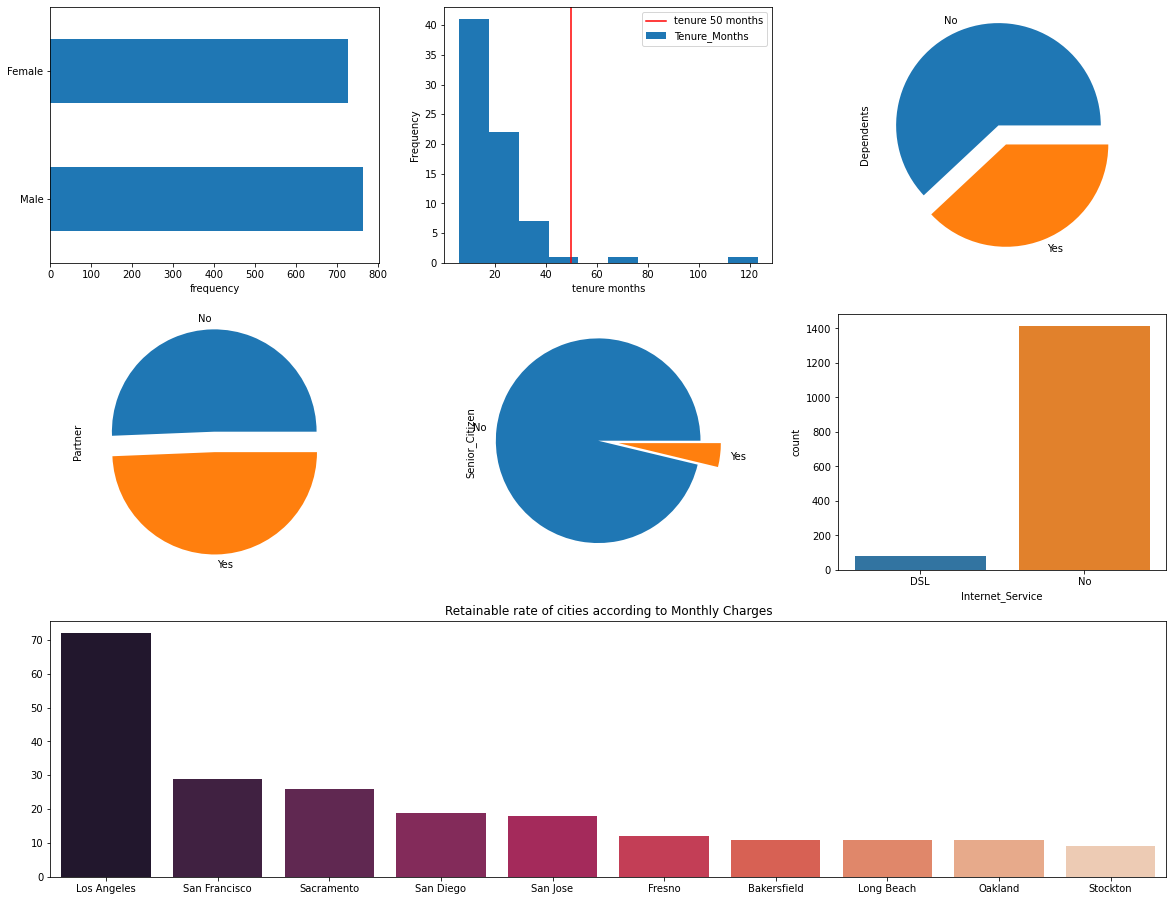

In [36]:
plt.figure(figsize=(20,16))
plt.subplot2grid((3,3),(0,0))
df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Gender'].value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.subplot2grid((3,3),(0,1))
df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Tenure_Months'].value_counts().plot(kind='hist')
plt.axvline(50, label='tenure 50 months', color='red')
plt.legend()
plt.xlabel('tenure months')
plt.subplot2grid((3,3),(0,2))
df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Dependents'].value_counts().plot(kind='pie',explode=[0.1,0.1])
plt.subplot2grid((3,3),(1,0))
df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Partner'].value_counts().plot(kind='pie',explode=[0.1,0.1])
plt.subplot2grid((3,3),(1,1))
df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Senior_Citizen'].value_counts().plot(kind='pie',explode=[0.1,0.1])
plt.subplot2grid((3,3),(1,2))
data_1= df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['Internet_Service']
sns.countplot(data_1)
plt.subplot2grid((3,3),(2,0),colspan=3)
data_2 = df[(df['Monthly_Charges'] <= 30) & (df['Churn_Value']==0)]['City'].value_counts().nlargest(10)
plt.title('Retainable rate of cities according to Monthly Charges')
sns.barplot(x=data_2.index,y=data_2.values,palette='rocket',)

# **According to monthly charges analysis, it has a retain rate that peaks at about $30. So, I think this point may be important for the telco company. Because of this i prepared a dashboard according to monthly charges.**

---

**We can populate a new feature, If customers have movies streaming and TV streaming,We can group these customers into a single category.** 

In [37]:
df.loc[(df['Streaming_Movies'] == 'Yes')&(df['Streaming_TV'] == 'Yes'),'Entertainment'] = 2
df.loc[(df['Streaming_Movies'] == 'No internet service')&(df['Streaming_TV'] == 'No internet service'),'Entertainment'] = 0
df['Entertainment'].fillna(1,inplace=True)

In [38]:
import folium
from folium.plugins import MarkerCluster
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap
import math

In [39]:
def PlotLocations(data):
    data['Latitude'] = data['Latitude'].astype(float)
    data['Longitude'] = data['Longitude'].astype(float)
    
    m_3 = folium.Map(location=[33.964131,-118.272783], tiles='cartodbpositron', zoom_start=13)

    mc = MarkerCluster()
    for idx, row in data.iterrows():
        if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
            mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    m_3.add_child(mc)


    data_churn = data[data['Churn_Label'] == 'Yes']


    data_churn = data_churn[['Latitude', 'Longitude']]
    data_churn = data_churn.dropna(axis=0, subset=['Latitude','Longitude'])

    heat_data = [[row['Latitude'],row['Longitude']] for index, row in data_churn.iterrows()]

    HeatMap(heat_data).add_to(m_3)
    return m_3

In [40]:
PlotLocations(df)

# Modeling

In [86]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

##Library for Model performance
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,f1_score
from sklearn.metrics import average_precision_score,recall_score,precision_score,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [42]:
df.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason,Entertainment
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1.0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,1.0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,2.0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,2.0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,2.0


In [43]:
# We already create new column that named  `Entertainment`. Because of this we can remove streaming columns.
# Also,we remove `Churn Reason`. Because we already know churn label if there is a reason.
data_ml = df.drop(['CustomerID','Count','Country','State','Streaming_TV', 'Streaming_Movies','Churn_Label','Churn_Score', 'CLTV', 'Churn_Reason'],axis=1)

In [44]:
data_ml.columns

Index(['City', 'Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Gender',
       'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges',
       'Total_Charges', 'Churn_Value', 'Entertainment'],
      dtype='object')

In [45]:
data_ml.isnull().sum()

City                 0
Zip_Code             0
Lat_Long             0
Latitude             0
Longitude            0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
Entertainment        0
dtype: int64

Columns with only two possible distinct values, are need to be Label Encoded.


Categorical columns with more than two possible distinct values, are need to be One hot Encoded.

In [46]:
col_count=pd.DataFrame({"col_name":data_ml.nunique().index,
              "Unique_Val":data_ml.nunique()}).reset_index(drop=True)

def col_cat(col):
    x=[]
    for i in col:
        if i ==2:
            x.append('Binary')
        elif (i>2) & (i<7):
            x.append('Categorical')
        else:
            x.append('Continuous')
    return x

col_count['Type']=col_cat(col_count["Unique_Val"])
col_count

,col_name,Unique_Val,Type
0,City,1129,Continuous
1,Zip_Code,1652,Continuous
2,Lat_Long,1652,Continuous
3,Latitude,1652,Continuous
4,Longitude,1651,Continuous
5,Gender,2,Binary
6,Senior_Citizen,2,Binary
7,Partner,2,Binary
8,Dependents,2,Binary
9,Tenure_Months,73,Continuous


In [47]:
continuous=list(col_count[col_count["Type"]=='Continuous']['col_name'])
binary=list(col_count[col_count["Type"]=='Binary']['col_name'])
categorical=list(col_count[col_count["Type"]=='Categorical']['col_name'])
binary.pop(binary.index('Churn_Value'))

'Churn_Value'

In [48]:
binary.append('City')

In [49]:
le=LabelEncoder()
for i in binary:
    data_ml[i]=le.fit_transform(data_ml[i])

In [50]:
corrmat = data_ml.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

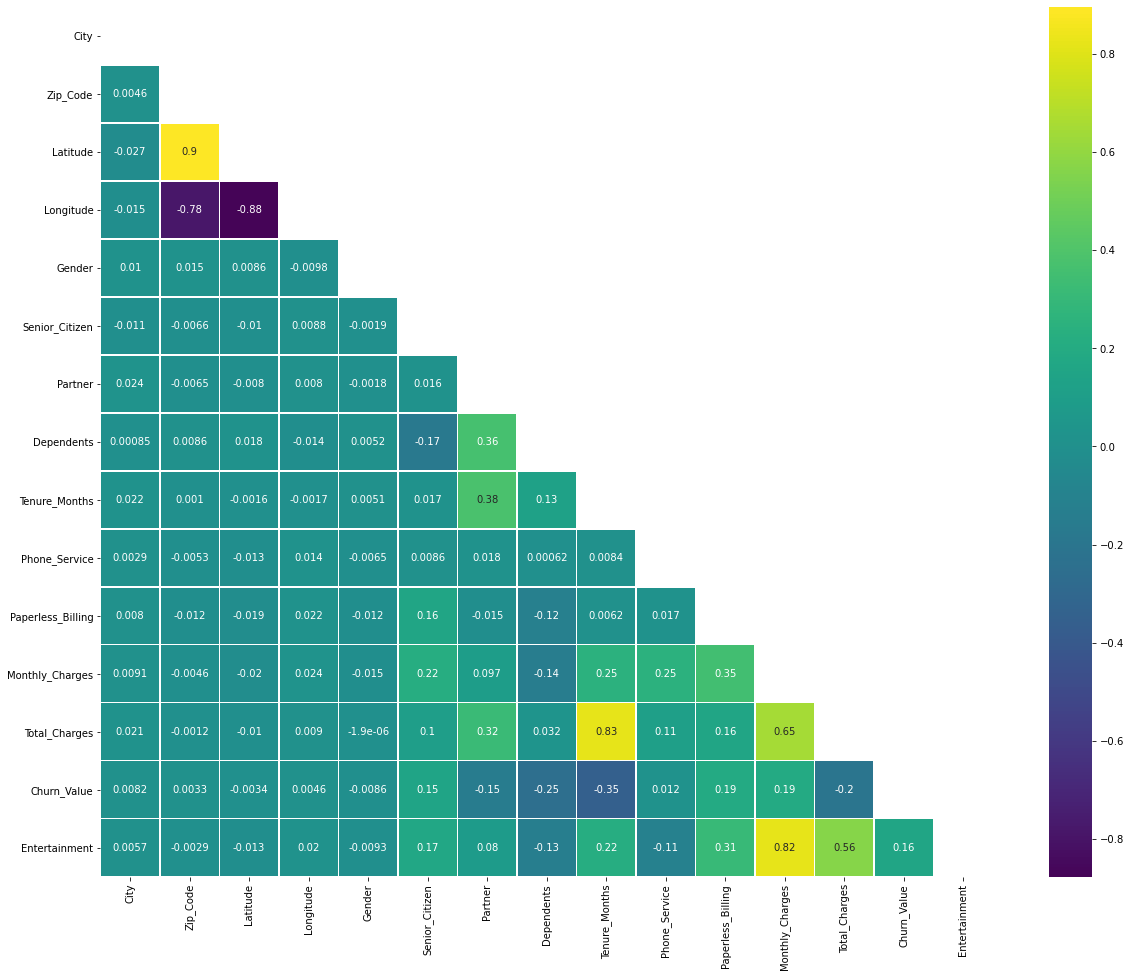

In [51]:
plt.figure(figsize=(20,16))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='viridis',fmt='.2g',linewidths=.5,center=0)

We can see from in above correlation matrix. Now, we will drop highly correlated features. 

In [52]:
data_ml.drop(['Lat_Long','Longitude','Latitude'],axis=1,inplace=True)

In [53]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int32  
 1   Zip_Code           7043 non-null   int64  
 2   Gender             7043 non-null   int32  
 3   Senior_Citizen     7043 non-null   int32  
 4   Partner            7043 non-null   int32  
 5   Dependents         7043 non-null   int32  
 6   Tenure_Months      7043 non-null   int64  
 7   Phone_Service      7043 non-null   int32  
 8   Multiple_Lines     7043 non-null   object 
 9   Internet_Service   7043 non-null   object 
 10  Online_Security    7043 non-null   object 
 11  Online_Backup      7043 non-null   object 
 12  Device_Protection  7043 non-null   object 
 13  Tech_Support       7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   int32  
 16  Payment_Method     7043 

In [54]:
X = data_ml.drop('Churn_Value',axis=1)
y = data_ml['Churn_Value']

In [55]:
X.shape,y.shape

((7043, 20), (7043,))

In [56]:
categorical_indexes=[i for i,j in enumerate(X.columns) if j in categorical]
X_columns = X.columns
X=X.values
y=y.values

In [57]:
X_columns

Index(['City', 'Zip_Code', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges',
       'Total_Charges', 'Entertainment'],
      dtype='object')

In [58]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),list(categorical_indexes))],remainder='passthrough')
X=ct.fit_transform(X)

In [59]:
X

array([[1.0, 0.0, 0.0, ..., 1, 53.85, 108.15],
       [1.0, 0.0, 0.0, ..., 1, 70.7, 151.65],
       [0.0, 0.0, 1.0, ..., 1, 99.65, 820.5],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 103.2, 7362.9],
       [0.0, 1.0, 0.0, ..., 1, 29.6, 346.45],
       [1.0, 0.0, 0.0, ..., 1, 105.65, 6844.5]], dtype=object)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y, random_state = 42)

In [61]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [62]:
df['Churn_Label'].value_counts()[0]/df['Churn_Label'].value_counts()[1]

2.7683253076511503

In [63]:
Metric_scores = pd.DataFrame(columns=["Classifier","Accuracy","Cross_val_score", "f1-score","precision","recall"])

[17:48:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

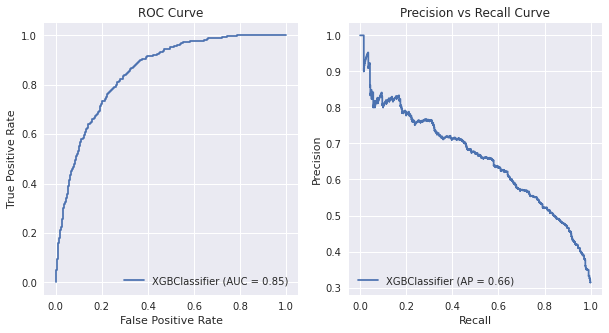

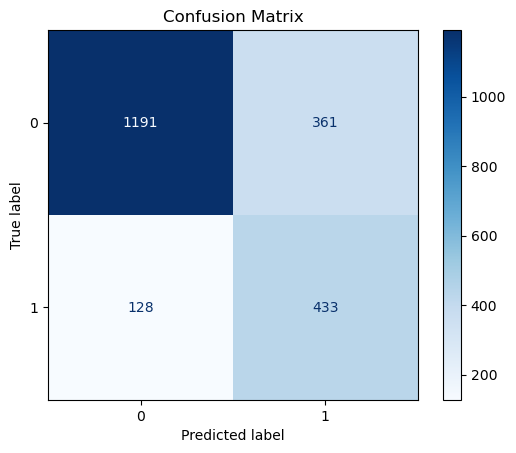

In [64]:
import ModelSelection
XGB,XGB_score = ModelSelection.XGBC(X_train_scaled,y_train,X_test_scaled,y_test,scale_pos_weight=3)
Metric_scores=Metric_scores.append(XGB_score,ignore_index=True)

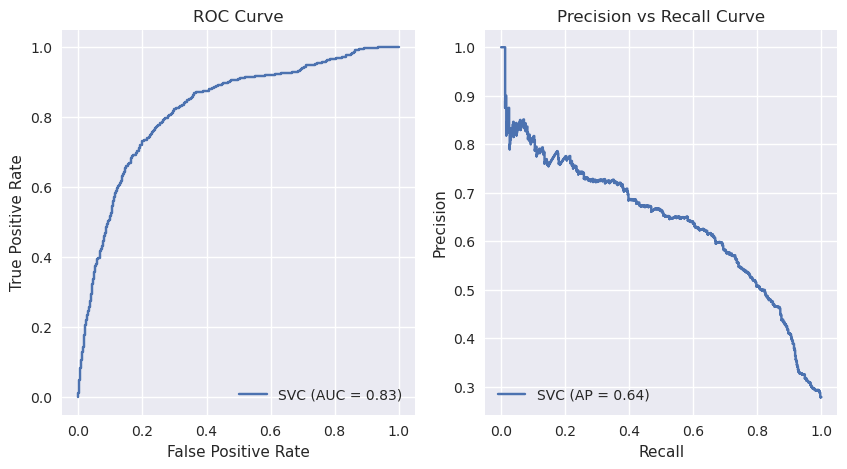

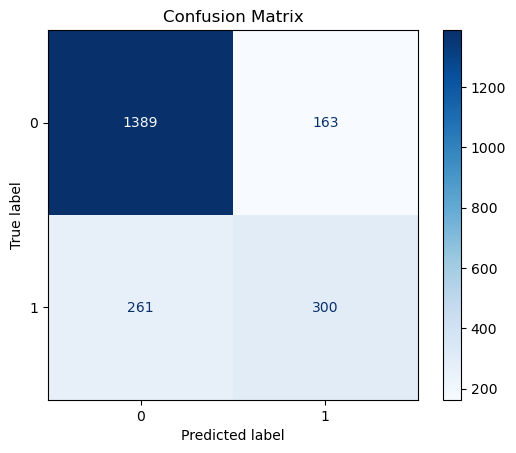

In [65]:
SVM,SVM_score = ModelSelection.SVM_C(X_train_scaled,y_train,X_test_scaled,y_test)
Metric_scores=Metric_scores.append(SVM_score,ignore_index=True)

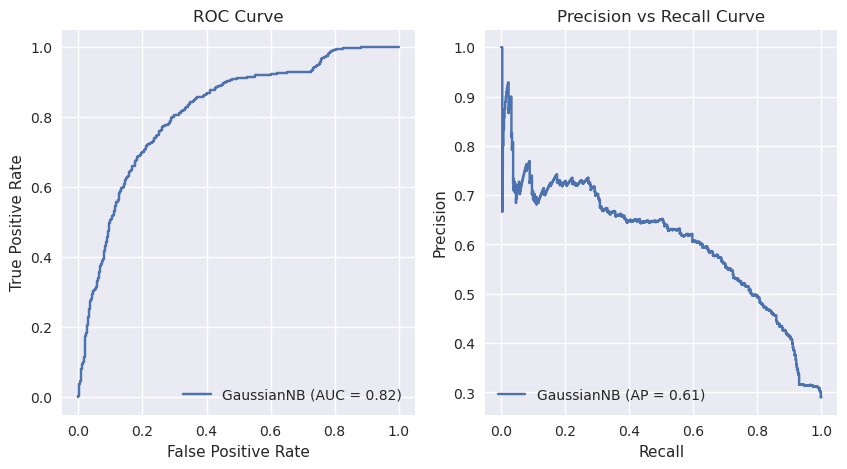

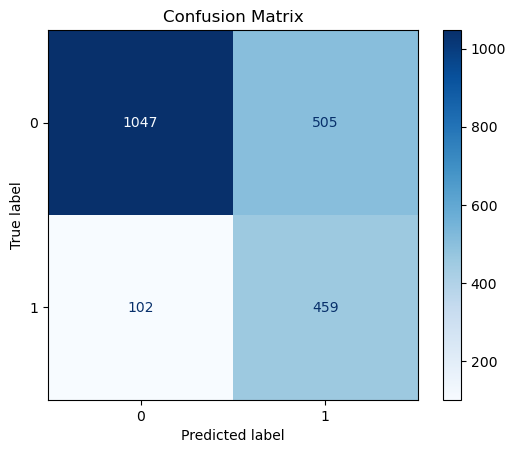

In [66]:
NB,NB_score = ModelSelection.NaiveBayes(X_train_scaled,y_train,X_test_scaled,y_test)
Metric_scores=Metric_scores.append(NB_score,ignore_index=True)

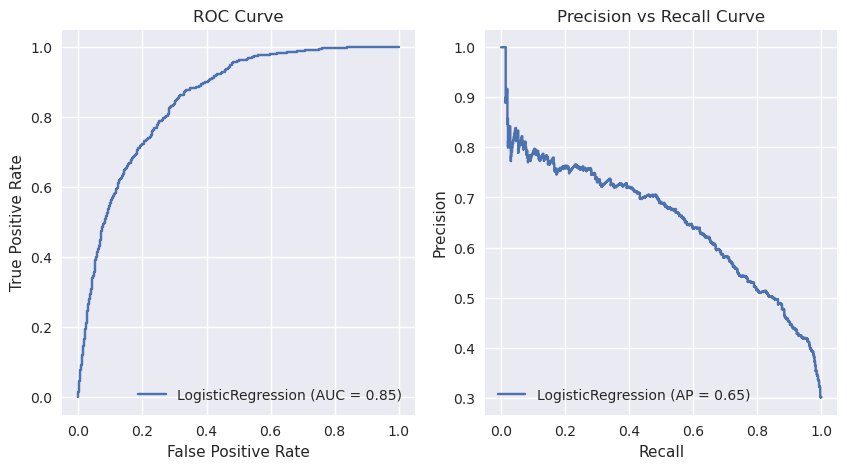

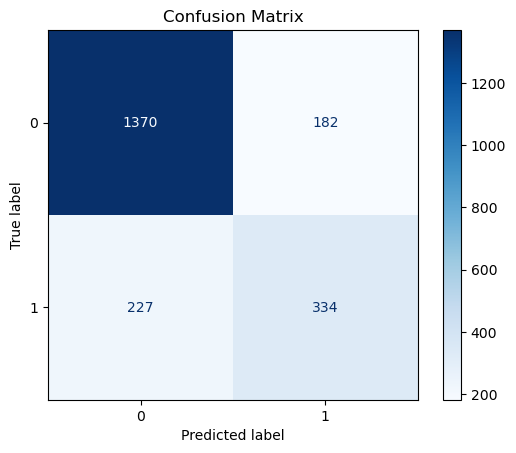

In [67]:
import ModelSelection
Logreg,logreg_score = ModelSelection.LogisticReg(X_train_scaled,y_train,X_test_scaled,y_test)
Metric_scores=Metric_scores.append(logreg_score,ignore_index=True)

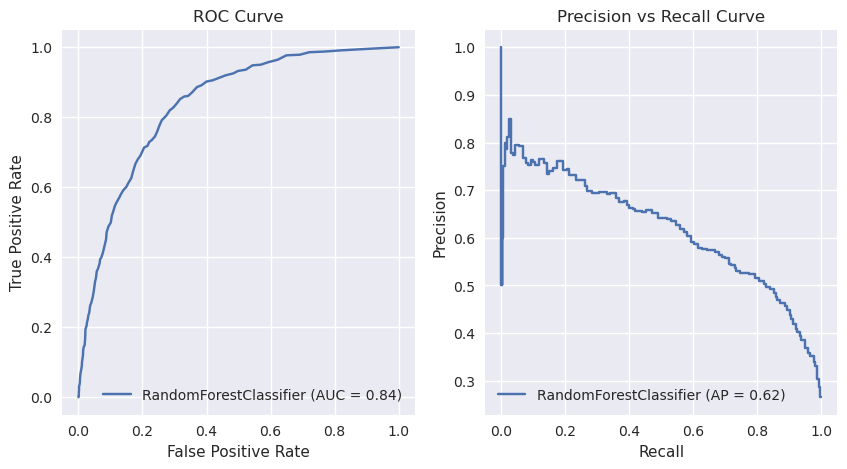

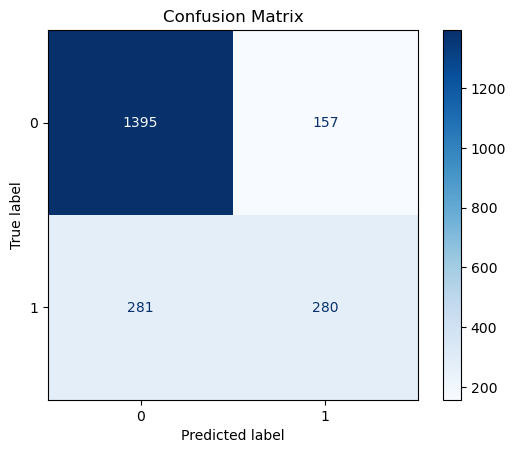

In [68]:
RFC,RFC_score=ModelSelection.RandomForest(X_train_scaled,y_train,X_test_scaled,y_test)
Metric_scores=Metric_scores.append(RFC_score,ignore_index=True)

In [69]:
Metric_scores

,Classifier,Accuracy,Cross_val_score,f1-score,precision,recall
0,XGBoost,0.768575,0.772414,0.779082,0.545340,0.771836
1,SVC,0.799337,0.810953,0.792806,0.647948,0.534759
2,NaiveBayes,0.712731,0.721907,0.729257,0.476141,0.818182
3,LogisticRegression,0.806436,0.812170,0.803776,0.647287,0.595365
4,RandomForestClassification,0.792712,0.804462,0.783816,0.640732,0.499109


In [70]:
Metric_scores.set_index('Classifier',drop=True,inplace=True)

<AxesSubplot:xlabel='Classifier'>

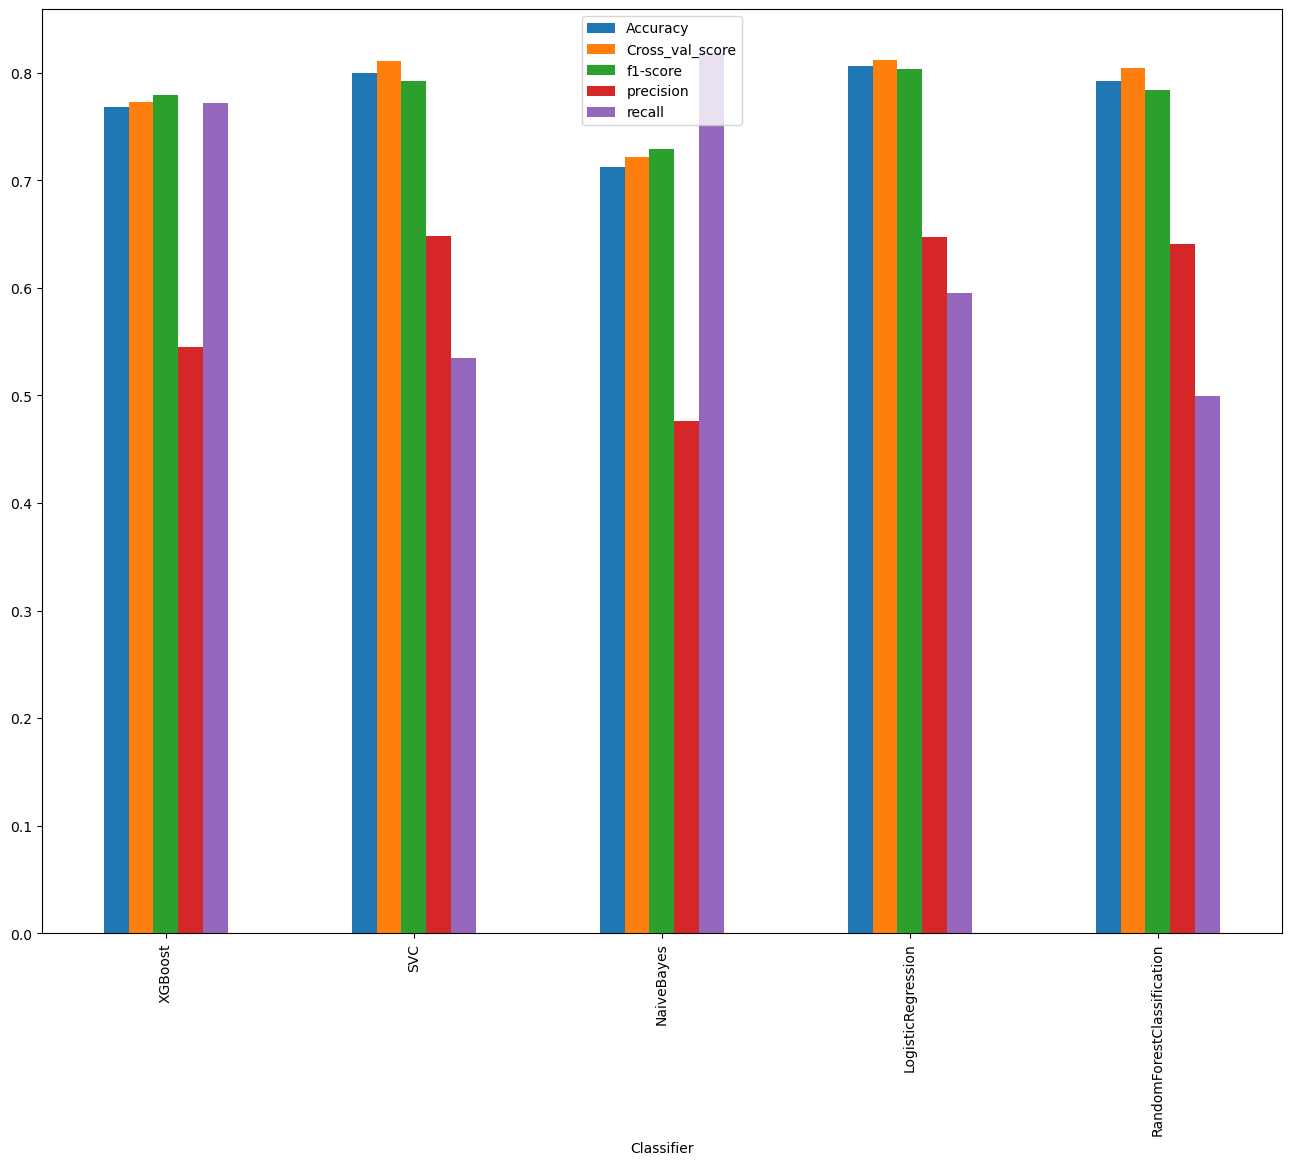

In [71]:
Metric_scores.plot.bar(figsize=(16, 12))

# GridSearchCV

Let's create a pipeline for GridSearchCV and let GridSearchCV choose the champion model.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [73]:
# Initialze the estimators
clf1 = XGBClassifier()
clf2 = SVC()
clf3 = GaussianNB()
clf4 = LogisticRegression()
clf5 = RandomForestClassifier()

In [102]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__min_child_weight'] = [70,140]
param1['classifier__subsample'] = [0.7,0.9]
param1['classifier__colsample_bytree'] = [0.8,0.6,0.4]
param1['classifier__scale_pos_weight'] = [3]
param1['classifier__eval_metric'] =  ['map','auc','error']
param1['classifier__classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__var_smoothing'] = [np.logspace(0,-9, num=100)]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param4['classifier__penalty'] = ['l1', 'l2']
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param5['classifier'] = [clf5]




In [103]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5]

In [113]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1,scoring='roc_auc').fit(X_train_scaled,y_train)

In [114]:
gs.best_params_

{'classifier': RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=10,
                        n_estimators=250),
 'classifier__class_weight': {0: 1, 1: 5},
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [115]:
# ROC-AUC score for the best model
gs.best_score_

0.8588572289266095

In [116]:
# Test data performance
y_pred_gs =  gs.predict(X_test_scaled)

print(classification_report(y_test,y_pred_gs))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1552
           1       0.54      0.79      0.64       561

    accuracy                           0.77      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.81      0.77      0.78      2113

